In [32]:
%load_ext autoreload
%autoreload 2

import auxiliary.util as util
import pickle as pkl
import numpy as np
import random
from typing import Union, List, Tuple, Optional

from torch_geometric.data import Dataset
#import imitation_data_loading
#from tutor_data_loading import preprocess_observation, action_identificator, Episode, EpisodeStep, EpisodeSet, StepSet
import torch
import os
import json
import random
import wandb
import training.training as trn
from training.models import GCN, FCNN
from training.dataloader import TutorDataLoader
import collections
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [33]:
util.set_wd_to_package_root()
config = util.load_config()
processed_data_path = config['paths']['processed_tutor_imitation']
matrix_cache_path = config['paths']['con_matrix_cache']
feature_statistics_path = config['paths']['feature_statistics']
action_counter_path = config['paths']['action_counter']

# Training Loop

In [6]:
#todo seperate static (line capacities, 'standard' voltage) and dynamic attributes
#compare weights or/ex layers (sign?)
#feature: number of connected nodes?\

In [7]:
training_config = util.load_config()['training']

In [8]:
training_config

{'model_name': 'test_hetero_labelsmth',
 'model_tags': ['test'],
 'train_log_freq': 2000,
 'val_log_freq': 60,
 'n_epoch': 100,
 'lr': 0.003,
 'network_type': 'heterogenous',
 'N_GNN_layers': 8,
 'N_node_hidden': 32,
 'LReLu_neg_slope': 0.1,
 'batch_size': 64,
 'label_smoothing_alpha': 0.2,
 'aggr': 'add',
 'N_f_gen': 3,
 'N_f_load': 3,
 'N_f_endpoint': 6}

In [13]:
%%wandb
import matplotlib.pyplot as plt



estimated_train_size = int(0.8*25993)
label_smth_alpha = training_config['label_smoothing_alpha']


with tqdm(total=n_epoch*estimated_train_size) as pbar:
    model.zero_grad()
    step=0
    for e in range(n_epoch):
        for datapoint in train_dl:
            
            #Get information from datapoint

            

            






                

                


  0%|          | 8700/2079400 [4:37:55<1102:28:36,  1.92s/it]  
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/matthijs/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-c5197ac40f48>", line 71, in <module>
    P = model(X_gen, X_load, X_or, X_ex, E, object_ptv).reshape((-1))
  File "/home/matthijs/Software/anaconda3/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1071, in _call_impl
    result = forward_call(*input, **kwargs)
  File "/home/matthijs/Projects/University/Masters_thesis/Software/GNN_PN_Operation_MSc_Thesis/model.py", line 162, in forward
    x=l(x, edge_index)
  File "/home/matthijs/Software/anaconda3/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1071, in _call_impl
    result = forward_call(*input, **kwargs)
  File "/home/matthijs/Software/anaconda3/lib/python3.8/site-packages/torch_geometric/nn/conv/hetero_conv.py", line 92, in forward
    out = conv(x=x_dict[src], edge_index=edge

TypeError: object of type 'NoneType' has no len()

In [14]:
norm_W_sb_neigh


2.266310691833496

In [15]:
model.lin_gen_1.weight

Parameter containing:
tensor([[-0.2379, -0.4808, -0.3585],
        [-0.1288,  0.4274, -0.5205],
        [ 0.4741,  0.3835, -0.3093],
        [-0.0464,  0.4933, -0.1828],
        [-0.4257,  0.4076,  0.1399],
        [-0.1824, -0.3836,  0.2479],
        [ 0.5565, -0.1509, -0.4988],
        [-0.5888,  0.3907,  0.0116],
        [ 0.1203, -0.5534, -0.3752],
        [ 0.3697,  0.4229,  0.0760],
        [-0.1694,  0.0545, -0.4772],
        [-0.3625,  0.3387,  0.3474],
        [-0.5713, -0.4578,  0.3157],
        [-0.3539,  0.3325, -0.2539],
        [-0.4976, -0.4762,  0.0238],
        [ 0.2982, -0.5198,  0.4801],
        [-0.5224, -0.4563, -0.1816],
        [-0.2758, -0.3707,  0.1586],
        [-0.0316,  0.1728,  0.5759],
        [ 0.5199,  0.0441, -0.4308],
        [ 0.2431, -0.1268,  0.4708],
        [ 0.3925,  0.2435, -0.4217],
        [ 0.5223,  0.3322,  0.4148],
        [-0.2115,  0.0356,  0.4968],
        [-0.2238, -0.5631,  0.3549],
        [-0.1094,  0.1531, -0.1201],
        [-0.4127

In [16]:
wrong_indices

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [17]:
print(abs(model.GNN_layers[6].convs['object__other_busbar__object'].lin_l.weight).sum())
print(abs(model.GNN_layers[6].convs['object__same_busbar__object'].lin_r.weight).sum())

tensor(93.0245, grad_fn=<SumBackward0>)
tensor(92.5276, grad_fn=<SumBackward0>)


In [18]:
model.GNN_layers[6].convs.values()

odict_values([SAGEConv(32, 32), SAGEConv(32, 32), SAGEConv(32, 32)])

In [19]:
diffs = []
for l in model.GNN_layers:
    print(l)
    if training_config['network_type'] == 'heterogenous':
        norm_W_self = abs(l.convs['object__same_busbar__object'].lin_r.weight).sum()
        norm_W_neigh = abs(l.convs['object__line__object'].lin_l.weight).sum() + \
                        abs(l.convs['object__same_busbar__object'].lin_l.weight).sum() + \
                        abs(l.convs['object__other_busbar__object'].lin_l.weight).sum()
        diffs.append(norm_W_self-norm_W_neigh)
    else:
        assert False, 'Not developped yet'

HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)


In [20]:
diffs

[tensor(-179.3683, grad_fn=<SubBackward0>),
 tensor(-182.3290, grad_fn=<SubBackward0>),
 tensor(-185.4459, grad_fn=<SubBackward0>),
 tensor(-190.0928, grad_fn=<SubBackward0>),
 tensor(-177.2830, grad_fn=<SubBackward0>),
 tensor(-185.9814, grad_fn=<SubBackward0>),
 tensor(-189.4445, grad_fn=<SubBackward0>),
 tensor(-4.3578, grad_fn=<SubBackward0>)]

In [21]:
model.GNN_layers[6].convs['object__same_busbar__object'].forward(torch.rand((1,32),device=device),
                                                                  torch.tensor([],dtype=torch.long,device=device).reshape(2,0))

tensor([[-0.4024, -0.2298, -0.5843,  0.2113,  0.0195,  0.5122,  0.0314,  0.0034,
         -0.4375, -0.0978,  0.5433, -0.0088,  0.4483,  0.0339, -0.0458, -0.1398,
         -0.0524,  0.6143, -0.6052, -0.5855, -0.4438, -0.7107, -0.6309, -0.1906,
          0.0552,  0.2951,  0.2318, -0.6349,  0.4756, -0.2710, -0.3650,  0.7686]],
       grad_fn=<AddBackward0>)

In [22]:
model.GNN_layers[6].convs['object__same_busbar__object'].lin_l.bias

Parameter containing:
tensor([-0.1600, -0.1250,  0.1153,  0.1432,  0.2888,  0.0582, -0.0455, -0.1784,
        -0.2181,  0.1439,  0.0528,  0.1741,  0.3131,  0.3825, -0.1560,  0.0673,
        -0.0247,  0.1230,  0.0985,  0.1045, -0.1527, -0.0467, -0.0805, -0.1043,
        -0.0272,  0.1199, -0.0111, -0.0191,  0.1485, -0.1440, -0.1403,  0.1936],
       requires_grad=True)

In [23]:
training_config['network_type']

'heterogenous'

# Feature importance analysis with SHAP

In [28]:
import shap

In [29]:
device = torch.device('cuda' if torch.cuda.is_available()
                                   else 'cpu')

In [30]:
class GCNAdapter(GCN):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def forward()
        
    

SyntaxError: invalid syntax (<ipython-input-30-a386499655de>, line 6)

In [35]:
train_config = config['training']
if config['training']['hyperparams']['model_type'] == 'GCN':
    model = GCNAdapter(train_config['hyperparams']['LReLu_neg_slope'],
                         train_config['hyperparams']['weight_init_std'],
                         train_config['GCN']['constants']['N_f_gen'],
                         train_config['GCN']['constants']['N_f_load'],
                         train_config['GCN']['constants']['N_f_endpoint'],
                         train_config['GCN']['hyperparams']['N_GCN_layers'],
                         train_config['hyperparams']['N_node_hidden'],
                         train_config['GCN']['hyperparams']['aggr'],
                         train_config['GCN']['hyperparams']['network_type'])
else: 
    model = FCNN(train_config['hyperparams']['LReLu_neg_slope'],
                                  train_config['hyperparams']['weight_init_std'],
                                  train_config['FCNN']['constants']['size_in'],
                                  train_config['FCNN']['constants']['size_out'],
                                  train_config['FCNN']['hyperparams']['N_layers'],
                                  train_config['hyperparams']['N_node_hidden'])
model.load_state_dict(torch.load('models/FCNN_test',map_location=torch.device('cpu')))
model.eval()

FCNN(
  (activation_f): LeakyReLU(negative_slope=0.1)
  (lin_first): Linear(344, 120, bias=True)
  (lin_middle_layers): ModuleList(
    (0): Linear(120, 120, bias=True)
    (1): Linear(120, 120, bias=True)
  )
  (lin_last): Linear(120, 56, bias=True)
)

In [47]:
if config['training']['hyperparams']['model_type'] == 'GCN':
    pass
else:
    val_dl = TutorDataLoader(processed_data_path + '/val', 
                 matrix_cache_path, 
                 feature_statistics_path, 
                 action_counter_path,
                 device, 
                 FCNN,
                 None,
                 False,
                 0)
    
    dps = torch.Tensor(0,config['training']['FCNN']['constants']['size_in'])

    val_dl_iter = val_dl.__iter__()
    for i in range(100):
        dp = next(val_dl_iter)
        dps = torch.cat((dps,dp['features'].reshape(1,-1)),axis=0)

e = shap.DeepExplainer(model, dps)
shap_values = e.shap_values(dps)
mean_shap_over_dps = np.array(shap_values).mean(axis=(1))
    


NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
None
> <string>(2)<module>()

ipdb> n
None
> <string>(3)<module>()

ipdb> n
None
> <string>(5)<module>()

ipdb> c
None
> <string>(27)<module>()

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
x
---------------------------------------------------------------------------
KeyboardInterrupt                         Traceback (most recent call last)
~/Software/anaconda3/lib/python3.8/site-packages/shap/explainers/_deep/__init__.py in shap_values(self, X, ranked_outputs, output_rank_order, check_additivity)
    122             were chosen as "top".
    123         """
--> 124         return self.explainer.shap_values(X, ranked_outputs, output_rank_order, check_additivity=check_additivity)

~/Software/anaconda3/lib/python3.8/site-packages/shap/explainers/_deep/deep_pytorch.py in shap_values(self, X, ranked_outputs, output_rank_order, check_additivity)
    183                 # run attribution computation graph
    184  

In [13]:
mean_shap_over_dps
N_gen = 5
N_f_gen= 3 #Number of generator features
N_load = 11
N_f_load= 3 #Number of load features
N_line = 20
N_f_endpoint= 6 #Number of endpoint (origin/extremity) features
       
c = 0
mean_shap_x_gen = mean_shap_over_dps[:,0:N_gen*N_f_gen]
c+=N_gen*N_f_gen
mean_shap_x_load = mean_shap_over_dps[:,c:c+N_load*N_f_load]
c+=N_load*N_f_load
mean_shap_x_or = mean_shap_over_dps[:,c:c+N_line*N_f_endpoint]
c+=N_line*N_f_endpoint
mean_shap_x_ex = mean_shap_over_dps[:,c:c+N_line*N_f_endpoint]
c+=N_line*N_f_endpoint
mean_shap_x_topo_vect = mean_shap_over_dps[:,c:]

In [14]:
mean_shap_x_gen = mean_shap_x_gen.transpose().reshape(N_gen,N_f_gen,-1)
mean_shap_x_load = mean_shap_x_load.transpose().reshape(N_load,N_f_load,-1)
mean_shap_x_or = mean_shap_x_or.transpose().reshape(N_line,N_f_endpoint,-1)
mean_shap_x_ex = mean_shap_x_ex.transpose().reshape(N_line,N_f_endpoint,-1)
mean_shap_x_topo_vect = mean_shap_x_topo_vect.transpose()

## Plots

<BarContainer object of 56 artists>

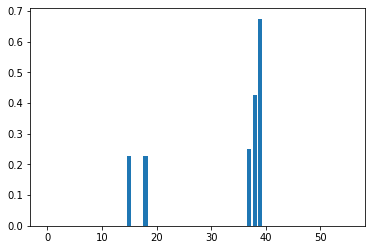

In [17]:
plt.bar(range(len(e.expected_value)),e.expected_value)

<BarContainer object of 56 artists>

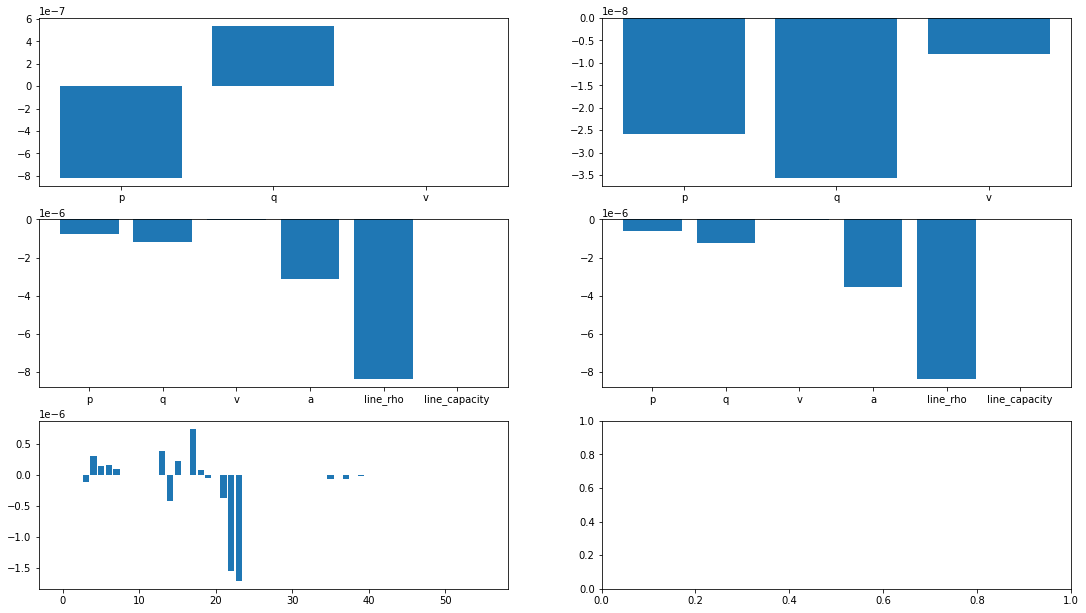

In [31]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(18.5, 10.5)
axs[0,0].bar(['p','q','v'],mean_shap_x_gen.mean(axis=(0,2)))
axs[0,1].bar(['p','q','v'],mean_shap_x_load.mean(axis=(0,2)))
axs[1,0].bar(['p', 'q', 'v', 'a', 'line_rho','line_capacity'],mean_shap_x_or.mean(axis=(0,2)))
axs[1,1].bar(['p', 'q', 'v', 'a', 'line_rho','line_capacity'],mean_shap_x_ex.mean(axis=(0,2)))
axs[2,0].bar(range(len(mean_shap_x_topo_vect)),mean_shap_x_topo_vect.mean(axis=1))

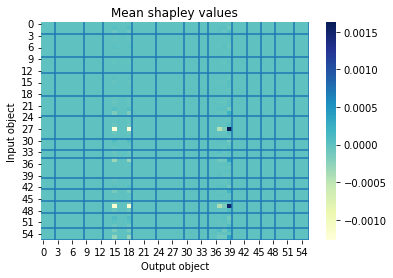

In [23]:
import matplotlib.gridspec as gridspec
import seaborn as sns

cumulative_sub_info = np.cumsum([3, 6, 4, 6, 5, 6, 3, 2, 5, 3, 3, 3, 4, 3])
grid = np.concatenate([mean_shap_x_gen.mean(axis=1),
                       mean_shap_x_load.mean(axis=1),
                       mean_shap_x_or.mean(axis=1),
                       mean_shap_x_ex.mean(axis=1)])
ax = sns.heatmap(grid, cmap="YlGnBu")
fig.set_size_inches(18.5, 10.5)
ax.set(xlabel='Output object', ylabel='Input object', title='Mean shapley values')
ax.vlines(cumulative_sub_info, *ax.get_xlim())
ax.hlines(cumulative_sub_info, *ax.get_xlim())

In [35]:
len(cumulative_sub_info)

14

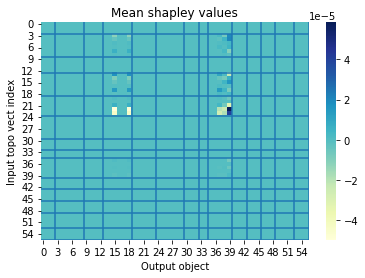

In [27]:
grid = mean_shap_x_topo_vect
ax = sns.heatmap(grid, cmap="YlGnBu")
fig.set_size_inches(18.5, 10.5)
ax.set(xlabel='Output object', ylabel='Input topo vect index', title='Mean shapley values')
ax.vlines(cumulative_sub_info, *ax.get_xlim())
ax.hlines(cumulative_sub_info, *ax.get_xlim())

In [ ]:
grid

In [311]:
grid.shape

(56, 56)

In [254]:
mean_shap_x_gen

array([[[ 1.72997969e-08,  1.72916187e-08,  1.72921747e-08,
          1.72954106e-08,  1.72973488e-08,  1.72994261e-08,
          1.72934484e-08,  1.72914398e-08,  1.72934397e-08,
          1.72944014e-08,  1.72946798e-08,  1.73022710e-08,
          1.72909267e-08, -2.60495987e-09, -2.59513310e-09,
          1.09558855e-05, -2.58306052e-09, -2.59526724e-09,
          1.09056494e-05,  1.72926451e-08,  1.72975157e-08,
          1.72905257e-08,  1.72954664e-08,  1.72960675e-08,
          1.72986258e-08,  1.72928035e-08,  1.72932904e-08,
          1.72885494e-08,  1.72954951e-08,  1.72938380e-08,
          1.72910534e-08,  1.72912815e-08,  1.72922397e-08,
          1.72957484e-08,  1.72925259e-08,  1.38231307e-08,
          1.36393612e-08, -1.96600839e-06, -1.50593343e-06,
         -2.17952287e-05,  1.72965281e-08,  1.72926261e-08,
          1.73085515e-08,  1.72900251e-08,  1.72910999e-08,
          1.72934762e-08,  1.72982229e-08,  1.72983828e-08,
          1.72940451e-08,  1.72966292e-0

In [148]:
torch.mean(dps,axis=0)

tensor([ 0.9287, -0.3569,  0.8160,  0.8753,  1.6428,  0.8160, -1.1939,  0.5360,
        -1.1531, -1.4080, -0.3629, -1.2974,  0.9577, -1.2454,  0.8160, -0.1297,
        -0.1299,  1.3604,  2.9175,  2.9239,  1.3688,  0.9014,  0.8977,  1.1400,
        -0.6198, -0.6198,  1.2332, -0.4917, -0.4917, -0.7412,  0.1815,  0.1785,
        -0.7572, -0.5441, -0.5432, -0.7559, -0.7755, -0.7749, -0.7503, -0.6609,
        -0.6604, -0.7507, -0.3075, -0.3082, -0.7533, -0.3066, -0.3079, -0.7649,
         1.4695, -1.1245,  1.0277, -0.3133, -0.6179,  0.3476,  1.3928,  0.5314,
         1.0277, -0.3518, -0.6594,  0.3476,  1.0683, -0.7044,  1.0265, -0.4784,
        -0.7959,  0.3476,  0.9936, -0.4205,  1.0245, -0.5124, -0.8325,  0.3476,
         1.2582,  1.1679,  1.0223, -0.3362, -0.6426,  0.3476,  0.3065,  1.1208,
         1.0277, -0.6975, -1.0321,  0.3476, -2.2744, -1.3456,  0.8612, -0.3078,
        -0.6120,  0.3476, -0.2465,  0.9771, -0.9788,  0.2412,  0.4365, -0.1690,
        -0.1692,  0.6849, -0.9788,  0.08

# Testing with Jacobian

In [81]:
device = torch.device('cuda' if torch.cuda.is_available()
                                   else 'cpu')

In [84]:
train_config = config['training']
if config['training']['hyperparams']['model_type'] == 'GCN':
    model = GCN(train_config['hyperparams']['LReLu_neg_slope'],
                 train_config['hyperparams']['weight_init_std'],
                 train_config['GCN']['constants']['N_f_gen'],
                 train_config['GCN']['constants']['N_f_load'],
                 train_config['GCN']['constants']['N_f_endpoint'],
                 train_config['GCN']['hyperparams']['N_GNN_layers'],
                 train_config['hyperparams']['N_node_hidden'],
                 train_config['GCN']['hyperparams']['aggr'],
                 train_config['GCN']['hyperparams']['network_type'])
else: 
    model = FCNN(train_config['hyperparams']['LReLu_neg_slope'],
                                  train_config['hyperparams']['weight_init_std'],
                                  train_config['FCNN']['constants']['size_in'],
                                  train_config['FCNN']['constants']['size_out'],
                                  train_config['FCNN']['hyperparams']['N_layers'],
                                  train_config['hyperparams']['N_node_hidden'])
model.load_state_dict(torch.load('models/FCNN_test',map_location=torch.device('cpu')))
model.eval()

FCNN(
  (activation_f): LeakyReLU(negative_slope=0.1)
  (lin_first): Linear(344, 120, bias=True)
  (lin_middle_layers): ModuleList(
    (0): Linear(120, 120, bias=True)
    (1): Linear(120, 120, bias=True)
  )
  (lin_last): Linear(120, 56, bias=True)
)

In [85]:
val_dl = TutorDataLoader(processed_data_path + '/train', 
                 matrix_cache_path, 
                 feature_statistics_path, 
                 action_counter_path,
                 device, 
                 FCNN,
                 None,
                 False,
                 0)
        

In [87]:
jacobs_gen_mean = torch.zeros(3)
jacobs_load_mean = torch.zeros(3)
jacobs_or_mean = torch.zeros(6)
jacobs_ex_mean = torch.zeros(6)
jacobs_object_sum = torch.zeros((56,56))

Y_sum = torch.zeros(56)
for i in range(100):
    dp = next(val_dl.__iter__())
    print(dp)
    
    if type(model) == GCN:
        # Extract features
        X_gen = dp['gen_features']
        X_load = dp['load_features']
        X_or = dp['or_features']
        X_ex = dp['ex_features']

        # Extract the position topology vector, which relates the
        # objects ordered by type to their position in the topology vector
        object_ptv = dp['object_ptv']

        # Extract the edges
        E = dp['edges']

        # Pass through the model
        P = model(X_gen, X_load, X_or, X_ex, E, object_ptv).reshape((-1))
    elif type(model) == FCNN:
        # Pass through the model
        P = model(dp['features']).reshape((-1))

    #Extract the label, apply label smoothing
    Y = dp['change_topo_vect']
    label_smth_alpha = train_config['hyperparams'] \
                                        ['label_smoothing_alpha']
    Y_smth =(1-label_smth_alpha)*dp['change_topo_vect'] + \
              label_smth_alpha*0.5*torch.ones_like(Y,device=device)
    Y_sum += Y
    
    #Compute the weights for the loss
    non_sub_label_weight = train_config['hyperparams'] \
                                        ['non_sub_label_weight']
    Y_sub_mask, Y_sub_idx = trn.get_Y_subchanged(Y,dp['sub_info'])
    weights = trn.label_weights(1-Y_sub_mask,non_sub_label_weight)
    
    
    
    #Compute the loss, update gradients
    l = trn.BCELoss_labels_weighted(P,Y_smth,weights)
    l.backward()
    
    #Obtain the jacobian
    
    jacob = torch.autograd.functional.jacobian(func:= lambda xg, xl, xo, xe: \
                                   model(xg,xl,xo,xe,E,object_ptv),
                                   inputs=(X_gen, X_load, X_or, X_ex))
    
    #Aggregate the jacobian to determine the importance of each feature
    jacobs_gen_mean += torch.mean(torch.abs(out[0]),axis=(0,1,2))
    jacobs_load_mean += torch.mean(torch.abs(out[1]),axis=(0,1,2))
    jacobs_or_mean += torch.mean(torch.abs(out[2]),axis=(0,1,2))
    jacobs_ex_mean += torch.mean(torch.abs(out[3]),axis=(0,1,2))
    #jacobs_or_sum = torch.zeros(6)
    #jacobs_ex_sum = torch.zeros(6)
    
    #Aggregate the jacobian to determine the importance of each object's features to each objects output
    jacob_objects = torch.cat([torch.sum(torch.abs(out[0]),axis=(1,3)),
        torch.sum(torch.abs(out[1]),axis=(1,3)),
        torch.sum(torch.abs(out[2]),axis=(1,3)),
        torch.sum(torch.abs(out[3]),axis=(1,3))],axis=1)[:,object_ptv]
    jacobs_object_sum += jacob_objects

{'change_topo_vect': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]), 'sub_info': [3, 6, 4, 6, 5, 6, 3, 2, 5, 3, 3, 3, 4, 3], 'features': tensor([ 0.4465, -0.4393,  0.8160,  0.4225,  1.4462,  0.8160,  0.0230,  0.1868,
        -1.1531, -1.5408, -0.2657, -1.2974,  0.4021, -1.4507,  0.8160, -0.1051,
        -0.1029,  1.3688,  2.7758,  2.6538,  1.3688,  0.9098,  0.8991,  1.3115,
        -0.6357, -0.6318,  1.3287, -0.5075, -0.5098, -0.7412,  0.1050,  0.1057,
        -0.7597, -0.5467, -0.5454, -0.7599, -0.7781, -0.7742, -0.7526, -0.6927,
        -0.6878, -0.7496, -0.4398, -0.4487, -0.7525, -0.3544, -0.3572, -0.7664,
         1.1994, -1.1936,  1.0277, -0.4082, -0.7202,  0.3476,  0.7714, -0.0214,
         1.0277, -0.6092, -0.9369,  0.3476,  0.8126, -0.6294,  1.0277, -0.5759,
        -0.90

NameError: name 'X_gen' is not defined

<BarContainer object of 6 artists>

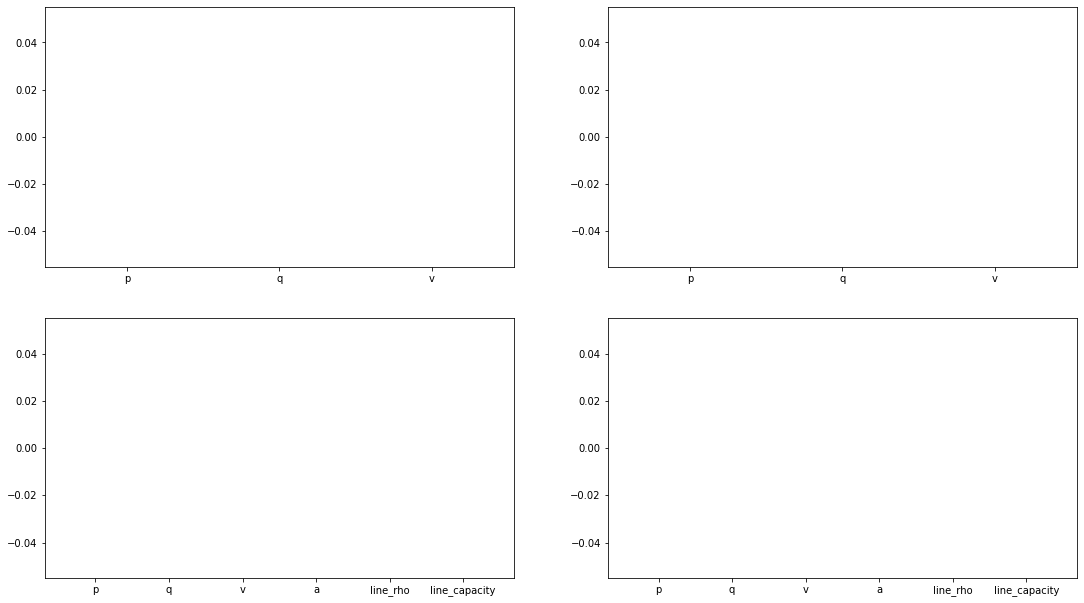

In [88]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
axs[0,0].bar(['p','q','v'],jacobs_gen_mean)
axs[0,1].bar(['p','q','v'],jacobs_load_mean)
axs[1,0].bar(['p', 'q', 'v', 'a', 'line_rho','line_capacity'],jacobs_or_mean)
axs[1,1].bar(['p', 'q', 'v', 'a', 'line_rho','line_capacity'],jacobs_ex_mean)
#axs[0,0].bar(['p','q','v'],jacobs_gen_mean)

NameError: name 'jacobs_sum' is not defined

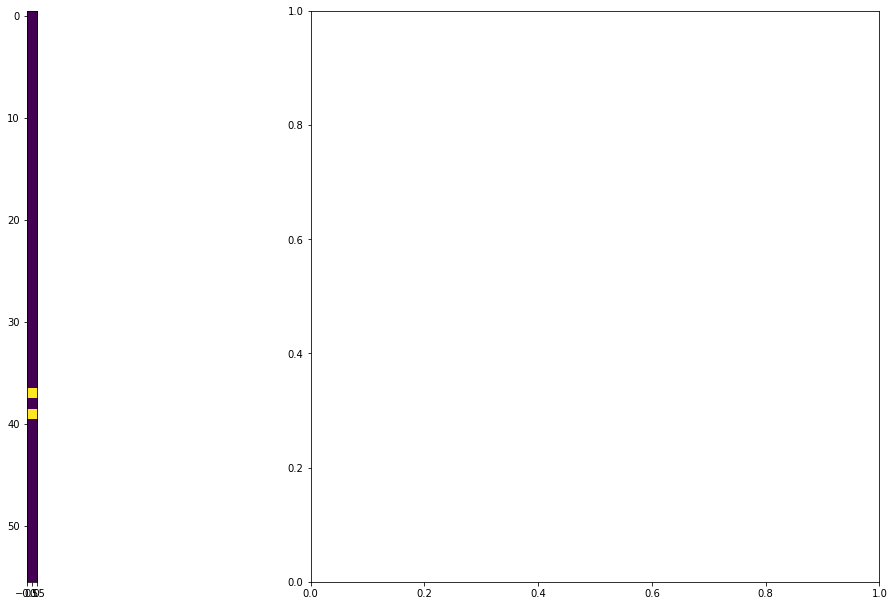

In [89]:
import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(1,2, height_ratios=[1,1], width_ratios=[1])
# print(gs)
# f = plt.figure()
# ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1])

fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [0.65, 1]})
fig.set_size_inches(18.5, 10.5)
#f.subplots_adjust(hspace=0)
axs[0].imshow(torch.log(Y_sum.reshape(-1,1)+0.1))
axs[1].imshow(jacobs_sum)

In [90]:
torch.argmax(jacobs_sum.sum(axis=0))

NameError: name 'jacobs_sum' is not defined

# Old

#### Testing whether the ordering checks out

In [24]:
ds = TutorDataset(processed_data_path, matrix_cache_path, feature_statistics_path)
dp = next(iter(ds))

NameError: name 'TutorDataset' is not defined

In [ ]:
gen_ptv = dp['gen_pos_topo_vect']
load_ptv = dp['load_pos_topo_vect']
or_ptv = dp['line_or_pos_topo_vect']
ex_ptv = dp['line_ex_pos_topo_vect']
object_indices = np.argsort(np.concatenate([gen_ptv,load_ptv,or_ptv,ex_ptv]))

In [ ]:
gen_ptv

In [ ]:
object_indices

In [ ]:
gen_dummy = len(gen_ptv)*[0]
gen_dummy[-1] = 1000
load_dummy = len(load_ptv)*[1]
or_dummy = len(or_ptv)*[2]
ex_dummy = len(ex_ptv)*[3]
dummies = np.array(gen_dummy + load_dummy + or_dummy + ex_dummy)
dummies[object_indices]

In [ ]:
dummies_tensor = torch.cat([torch.tensor(d) for d in [gen_dummy,load_dummy,or_dummy,ex_dummy]])
dummies_tensor[object_indices]